# Latent Dirichlet Allocation (LDA)

In [ ]:
import pandas as pd
from gensim import corpora
from gensim.models import LdaModel
from gensim.models import TfidfModel
from gensim.models.coherencemodel import CoherenceModel
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

In [ ]:
# Step 1: Load dataset
df = pd.read_pickle('tokenized_tweets_lemmatzation.pkl')
tokenized_texts = df['text'].tolist()

### Create BoW Corpus and TF-IDF Matrix and corresponding Dictionaries for evaluation method

In [ ]:
# BoW
dictionary = corpora.Dictionary(tokenized_texts)
dictionary.filter_extremes(no_below=5, no_above=0.5)
bow_corpus = [dictionary.doc2bow(text) for text in tokenized_texts]

# TF-IDF
df['text'] = df['text'].apply(lambda x: " ".join(x))
tokenized_texts = df['text'].apply(lambda x: x.split()).tolist()

tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text'])
tfidf_terms = tfidf_vectorizer.get_feature_names_out()
tfidf_dictionary = corpora.Dictionary([tfidf_terms])

# Convert TF-IDF matrix into Gensim corpus ->  alignment with the dictionary
tfidf_corpus = [
    [(tfidf_dictionary.token2id[tfidf_terms[idx]], value) for idx, value in zip(row.indices, row.data)]
    for row in tfidf_matrix
]


### Training parameters for models


In [ ]:
# LDA requires a preset k of Topics and training phases
#num_topics = 20
passes = 10

### Coherence Scores for BoW and TF-IDF

In [ ]:
coherence_scores_bow = []
for num_topics in range(5, 32):
    lda = LdaModel(corpus=bow_corpus, num_topics=num_topics, id2word=dictionary, random_state=42, passes=passes)
    coherence_model = CoherenceModel(model=lda, texts=tokenized_texts, dictionary=dictionary, coherence='c_v')
    coherence_scores_bow.append((num_topics, coherence_model.get_coherence()))
    print(f"BoW - Num Topics: {num_topics}, Coherence Score: {coherence_model.get_coherence()}")

coherence_scores_tfidf = []
for num_topics in range(5, 32):
    lda_tfidf_model = LdaModel(corpus=tfidf_corpus, num_topics=num_topics, id2word=tfidf_dictionary, passes=passes, random_state=42)
    coherence_model_tfidf = CoherenceModel(model=lda_tfidf_model,texts=tokenized_texts,dictionary=tfidf_dictionary,coherence='c_v')
    coherence_score = coherence_model_tfidf.get_coherence()
    coherence_scores_tfidf.append((num_topics, coherence_score))
    print(f"TF-IDF - Num Topics: {num_topics}, Coherence Score: {coherence_score}")

TF-IDF - Num Topics: 5, Coherence Score: 0.3219017632394528
TF-IDF - Num Topics: 6, Coherence Score: 0.34384938833299145
TF-IDF - Num Topics: 7, Coherence Score: 0.3661278714894746
TF-IDF - Num Topics: 8, Coherence Score: 0.37402411844601346
TF-IDF - Num Topics: 9, Coherence Score: 0.3927944728850721
TF-IDF - Num Topics: 10, Coherence Score: 0.3920986624040158
TF-IDF - Num Topics: 11, Coherence Score: 0.39420601120588666
TF-IDF - Num Topics: 12, Coherence Score: 0.3684441927511775
TF-IDF - Num Topics: 13, Coherence Score: 0.3759724482822074
TF-IDF - Num Topics: 14, Coherence Score: 0.351178408395341
TF-IDF - Num Topics: 15, Coherence Score: 0.3487141678298019
TF-IDF - Num Topics: 16, Coherence Score: 0.3476405170069884
TF-IDF - Num Topics: 17, Coherence Score: 0.3574739836197907
TF-IDF - Num Topics: 18, Coherence Score: 0.3420702387443977
TF-IDF - Num Topics: 19, Coherence Score: 0.3369595582226473
TF-IDF - Num Topics: 20, Coherence Score: 0.3481110210310137
TF-IDF - Num Topics: 21, Co

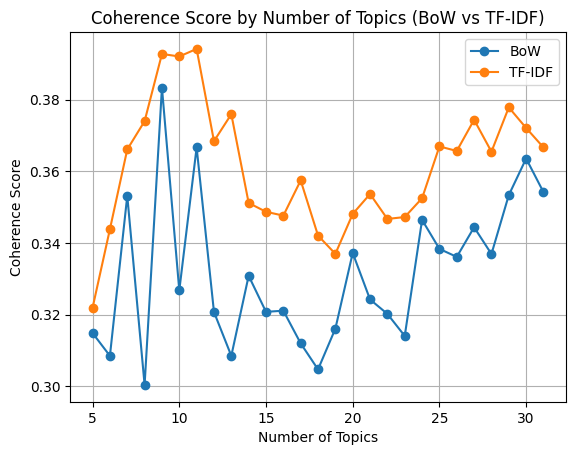

In [ ]:
# Step 8: Plot Coherence Scores for Comparison
bow_coherence_df = pd.DataFrame(coherence_scores_bow, columns=['Num Topics', 'Coherence Score (BoW)'])
tfidf_coherence_df = pd.DataFrame(coherence_scores_tfidf, columns=['Num Topics', 'Coherence Score (TF-IDF)'])

plt.plot(bow_coherence_df['Num Topics'], bow_coherence_df['Coherence Score (BoW)'], marker='o', label='BoW')
plt.plot(tfidf_coherence_df['Num Topics'], tfidf_coherence_df['Coherence Score (TF-IDF)'], marker='o', label='TF-IDF')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title('Coherence Score by Number of Topics (BoW vs TF-IDF)')
plt.legend()
plt.grid()
plt.show()

### Display Topics generated by model with TF-IDF - 11 Topics and 10 words per Topic

In [ ]:
lda_tfidf_model = LdaModel(corpus=tfidf_corpus, num_topics=11, id2word=tfidf_dictionary, passes=passes, random_state=42)

print("\nLDA Topics with TF-IDF:")
for idx, topic in lda_tfidf_model.show_topics(num_topics=num_topics, num_words=10, formatted=False):
  print(f"Topic {idx}: {', '.join([word for word, _ in topic])}")


LDA Topics with TF-IDF:
Topic 0: liked, beware, feminist, male, school, sexual, movement, trump, misconduct, woman
Topic 1: time, year, microsoft, person, try, collins, susan, way, eve, new
Topic 2: nyt, rose, ball, changing, silence, church, evangelical, accountability, knew, situation
Topic 3: latest, daily, video, christmas, thanks, entertainment, merry, news, industry, wow
Topic 4: video, dumbest, backlash, like, look, meh, porn, innocent, men, law
Topic 5: tax, creator, italy, tweet, chief, year, hero, word, scoop, cut
Topic 6: damon, matt, woman, movement, moment, reach, black, weinstein, chose, guess
Topic 7: protest, nfl, business, trump, maga, era, muslim, new, victory, press
Topic 8: movement, created, far, sexual, teaching, woman, debacle, say, time, violence
Topic 9: opinion, global, reckoning, woman, movement, joined, taken, men, learn, urging
Topic 10: movement, woman, voted, meryl, review, streep, sexually, story, theyre, sexual


### Create corresponding Wordcloud

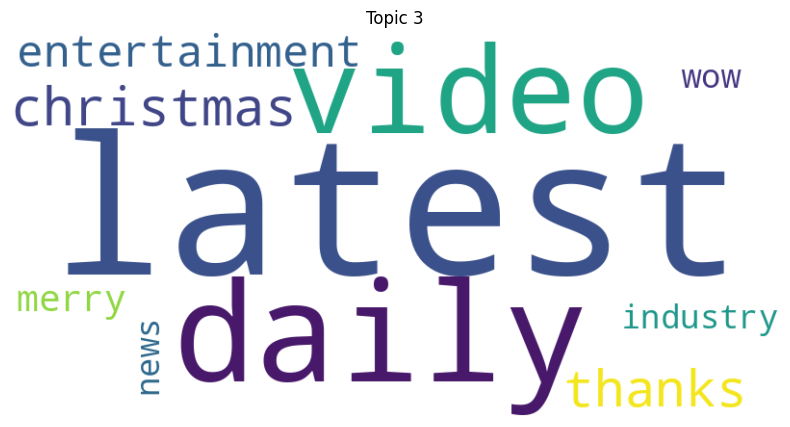

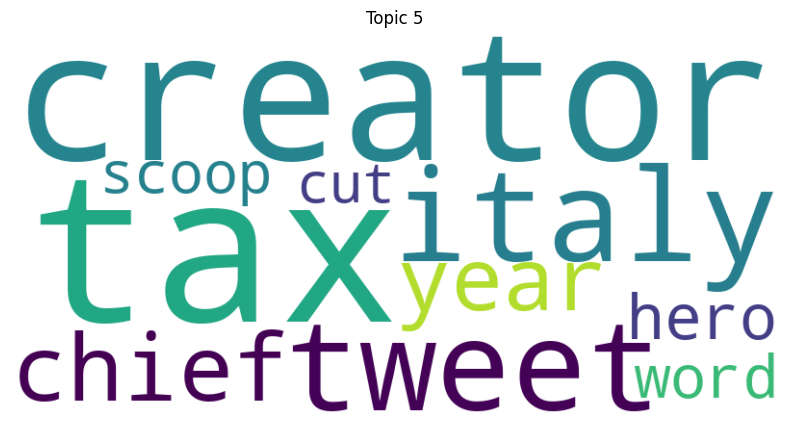

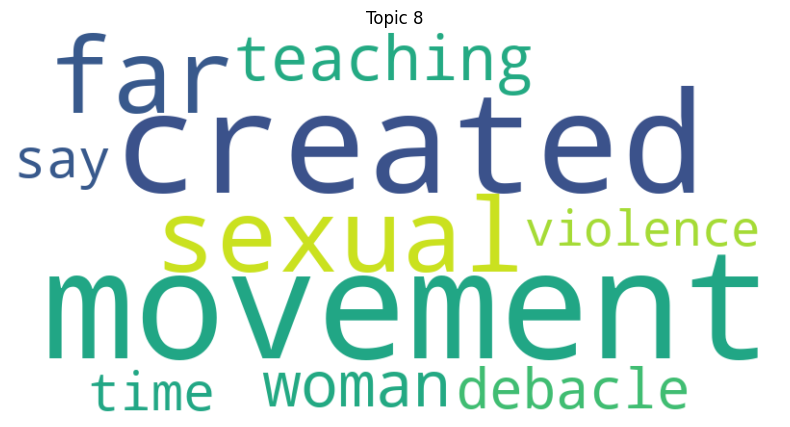

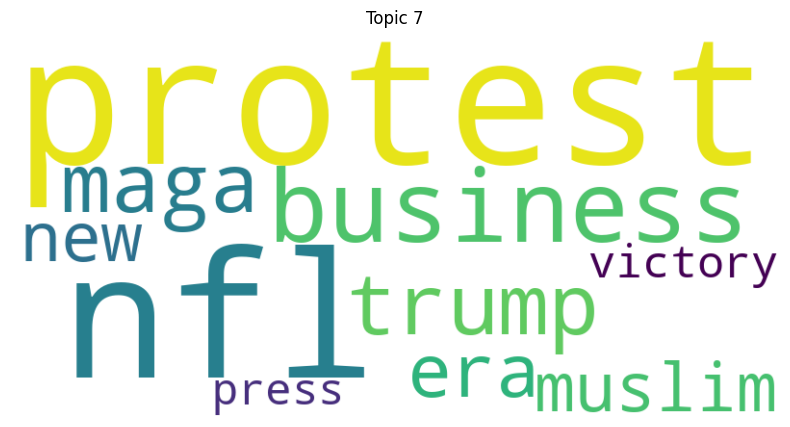

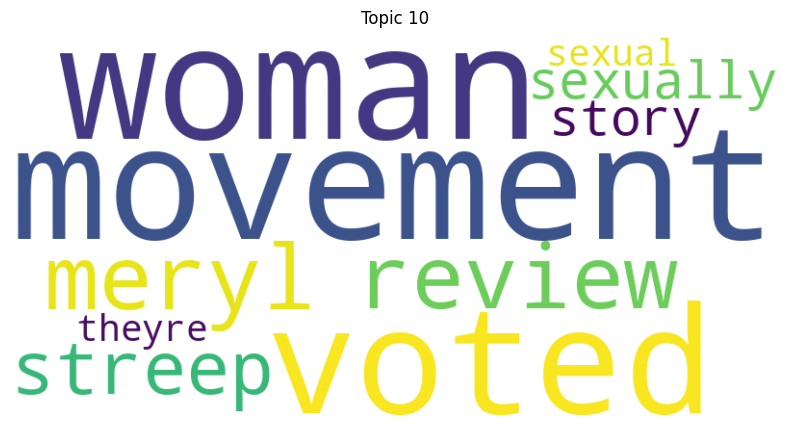

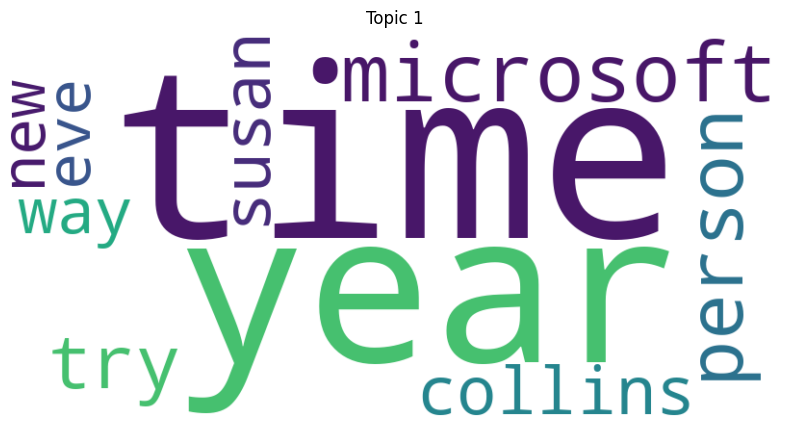

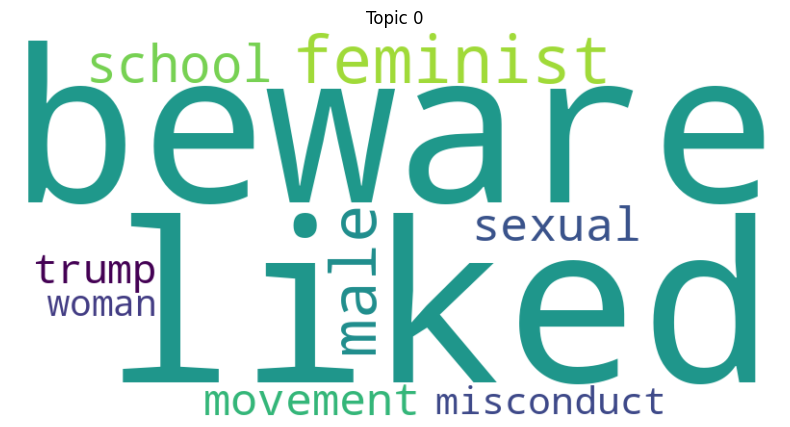

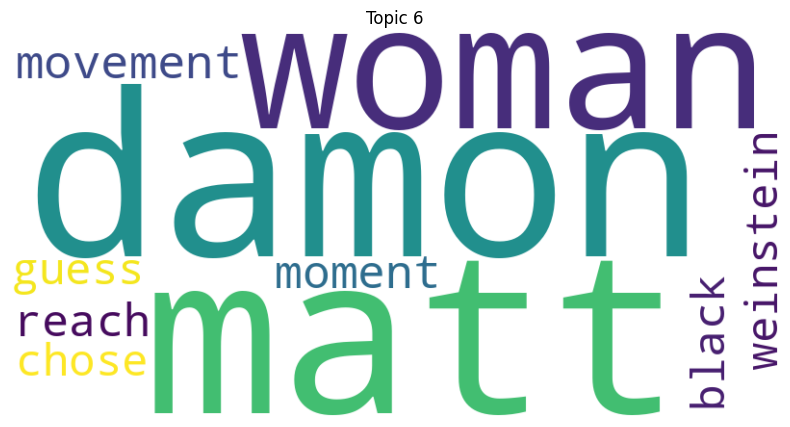

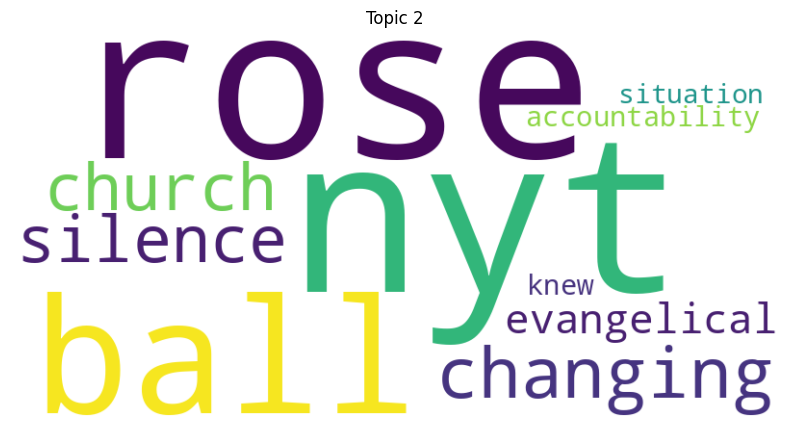

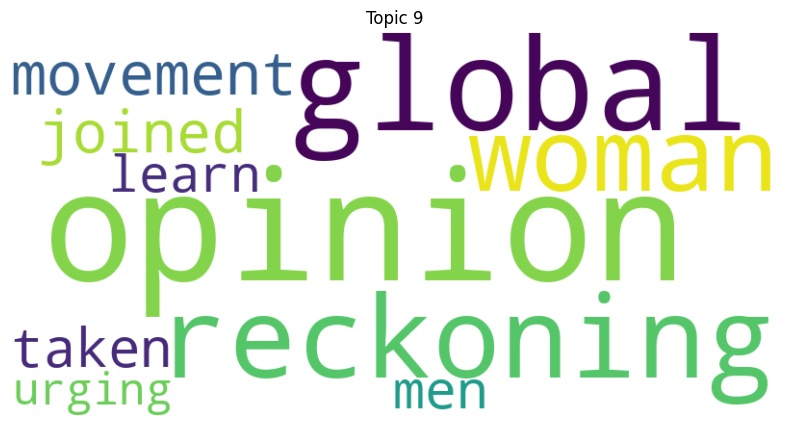

In [ ]:

import matplotlib.pyplot as plt

for i, topic in lda_tfidf_model.show_topics(formatted=False, num_words=10):
    words = dict(topic)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(words)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Topic {i}')
    plt.axis('off')
    plt.show()

### Topic Distribution Calculation

In [ ]:
from collections import Counter

document_topics = lda_tfidf_model[tfidf_corpus] # Get Topic Probabilities for Each Document
dominant_topics = [max(doc, key=lambda x: x[1])[0] if doc else -1 for doc in document_topics]# Assign Dominant Topic to Each Document

topic_distribution = Counter(dominant_topics) #Calculate Topic Distribution
print(f"Topic Distribution in Document Count per Topic: {dict(topic_distribution)}")


total_docs = len(tfidf_corpus)# Calculate percentages
topic_percentages = {topic: count / total_docs * 100 for topic, count in topic_distribution.items()}
print(f"Topic Distribution in Percentage: {topic_percentages}")

Topic Distribution (Document Count per Topic): {2: 11905, 6: 11335, 1: 11415, 8: 23185, 5: 5510, 0: 15839, 9: 7770, 10: 17556, 7: 12644, 3: 11227, 4: 6957}
Topic Distribution (Percentage): {2: 8.79616973171867, 6: 8.375017548007655, 1: 8.434126626423236, 8: 17.130549788315612, 5: 4.071137775873153, 0: 11.702858662804875, 9: 5.740969241113319, 10: 12.971487258299282, 7: 9.342189843582602, 3: 8.29522029214662, 4: 5.140273231714976}
